In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [3]:
with open('./svds.pickle', 'rb') as f:
    svds = pickle.load(f)

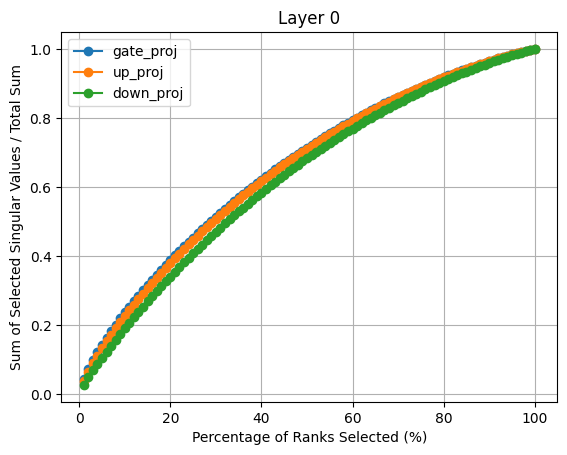

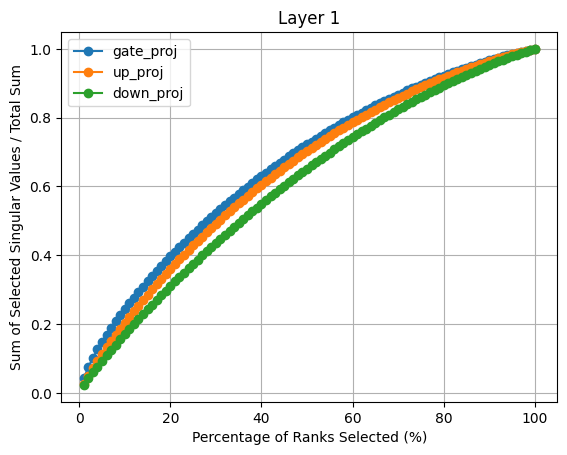

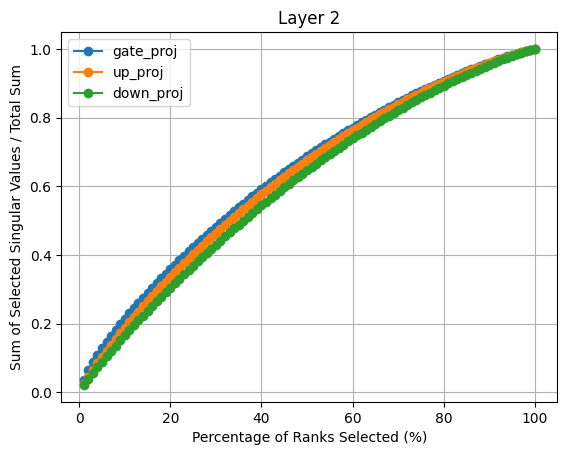

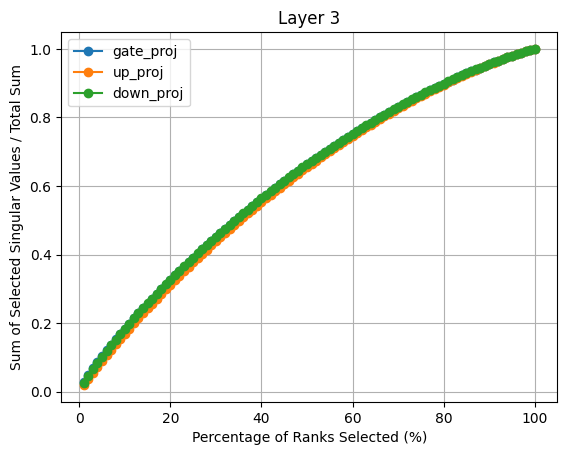

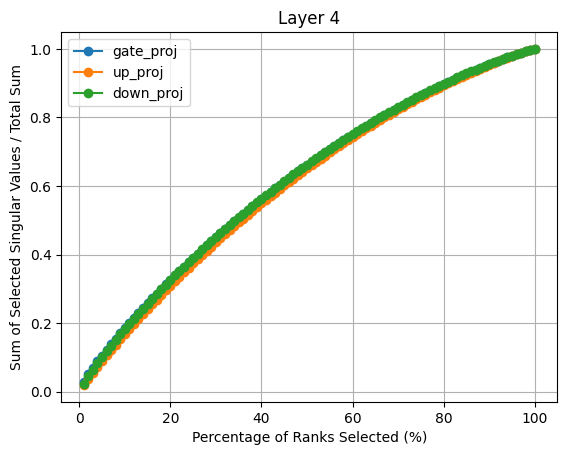

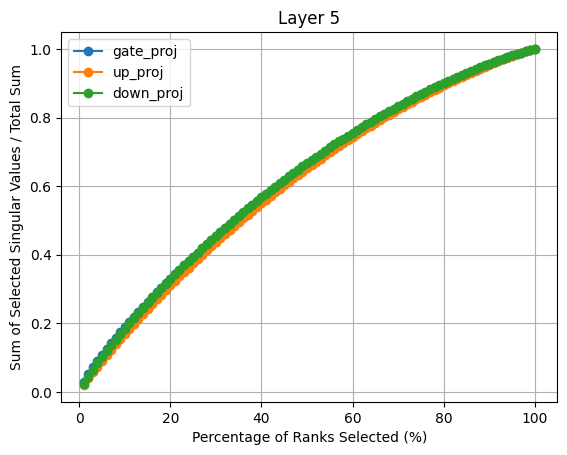

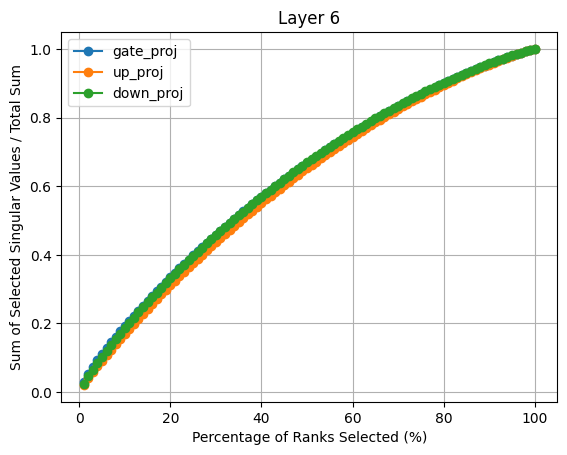

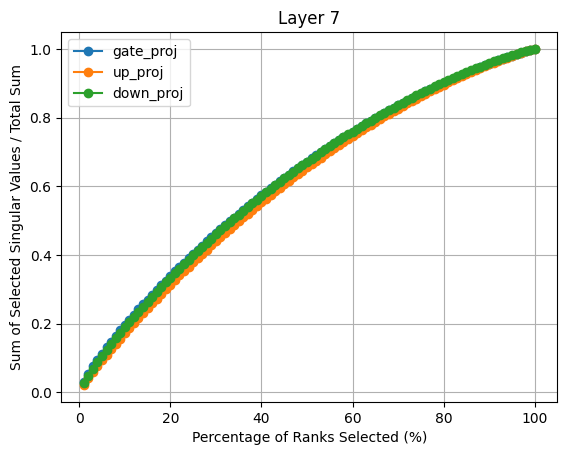

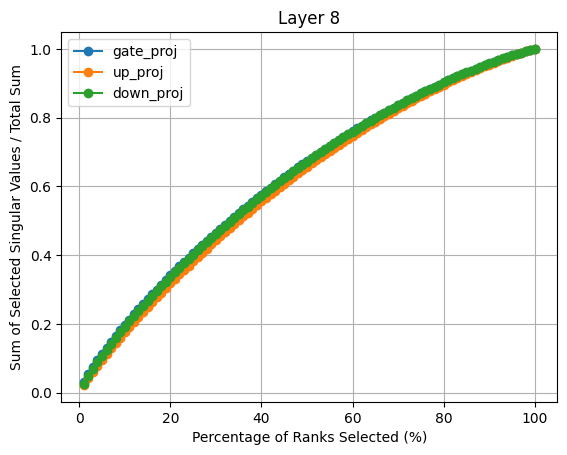

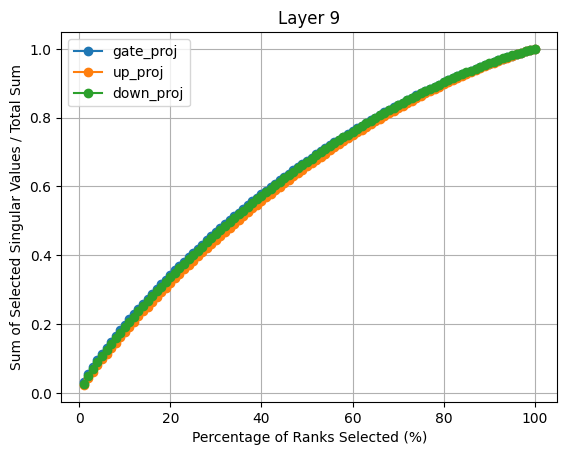

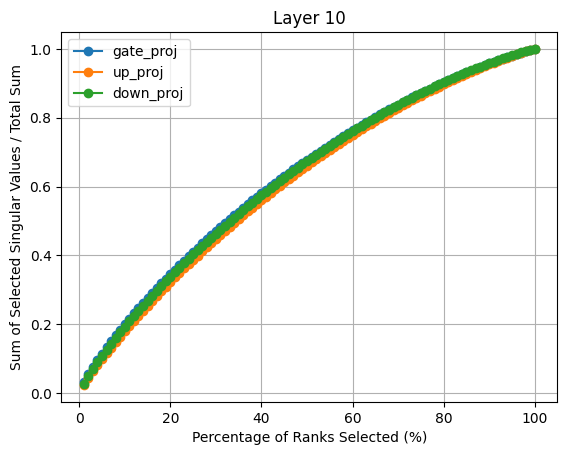

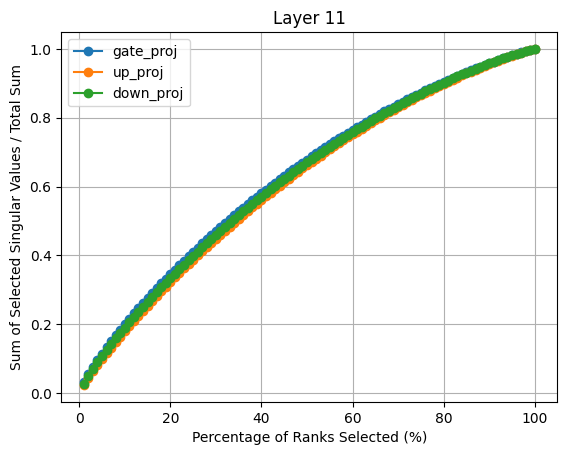

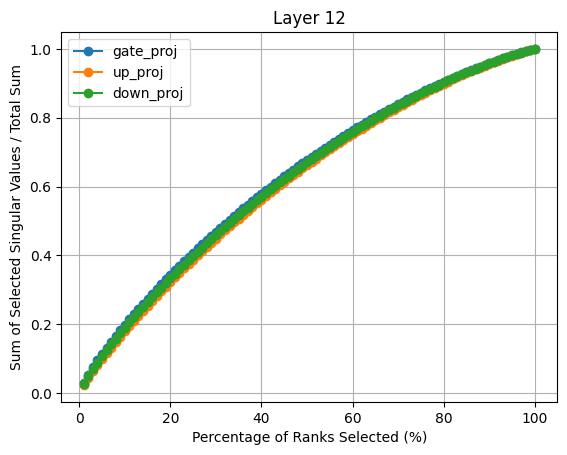

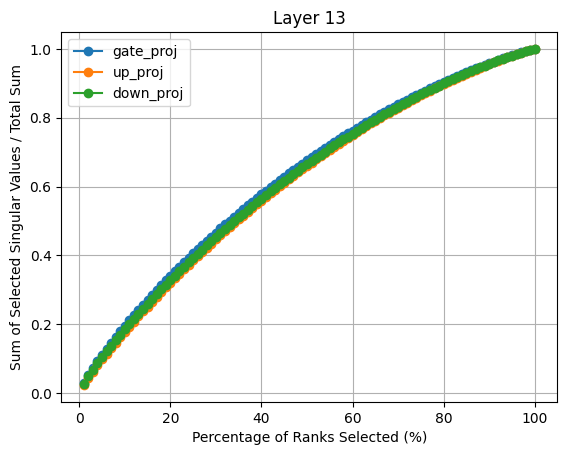

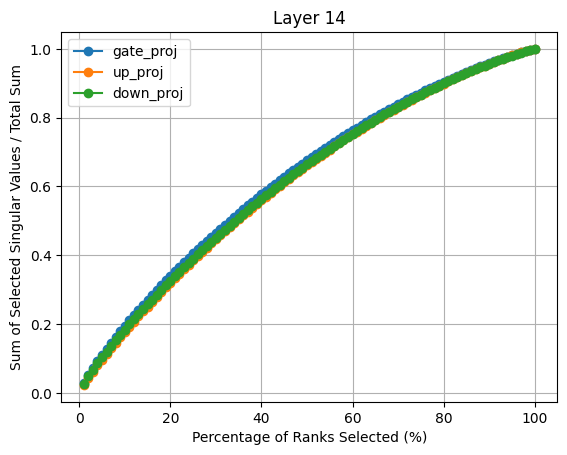

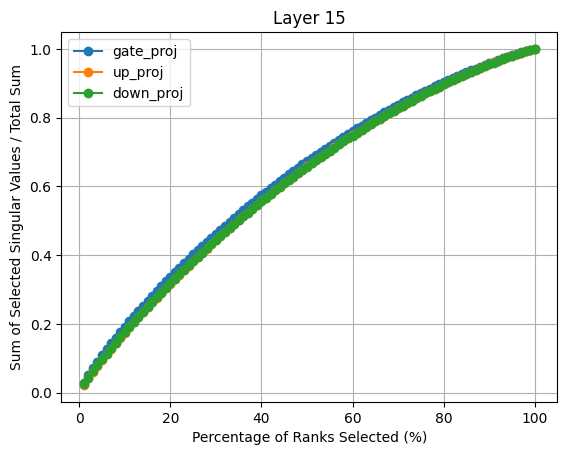

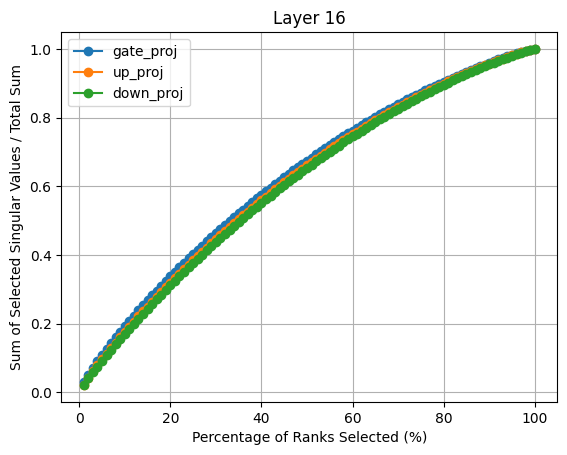

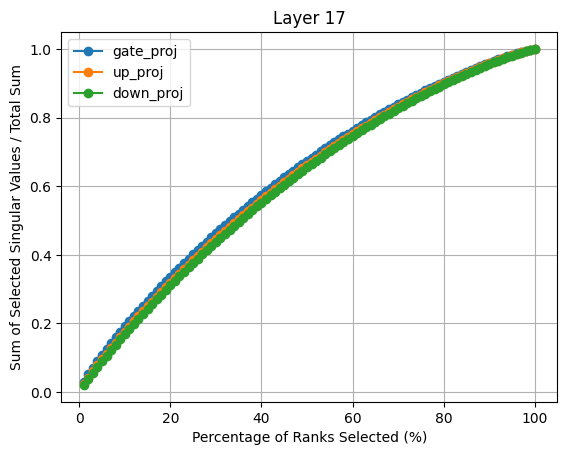

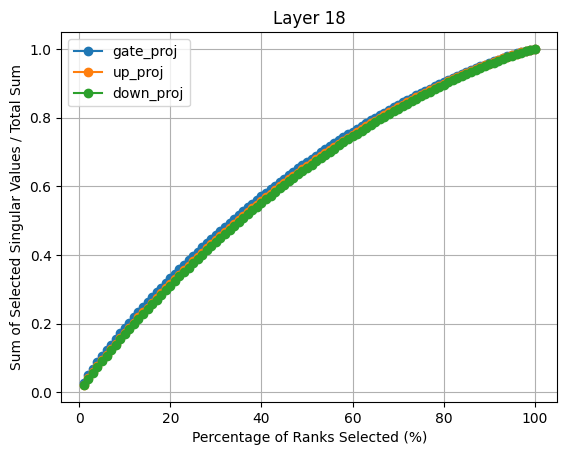

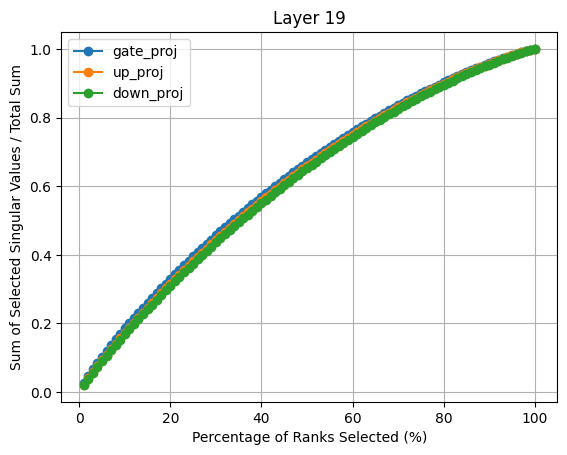

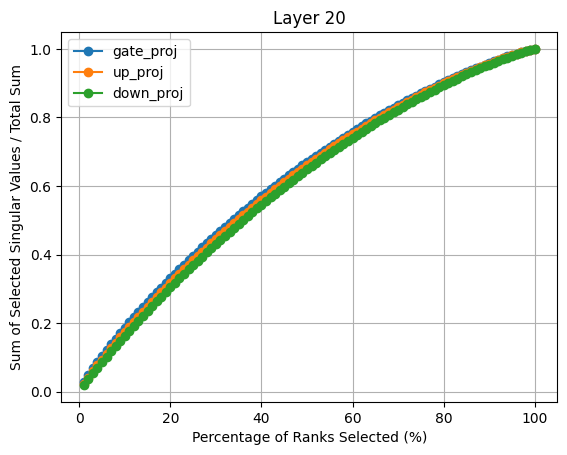

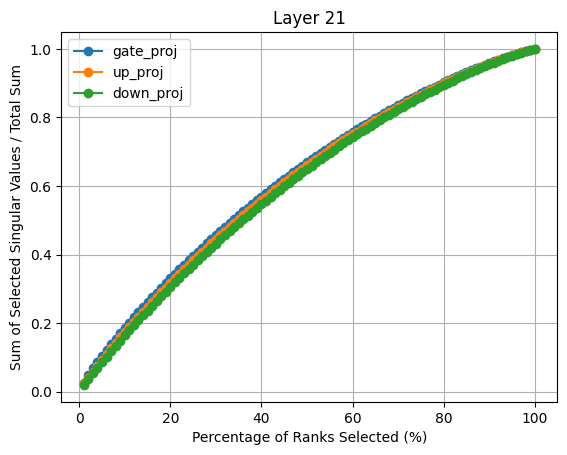

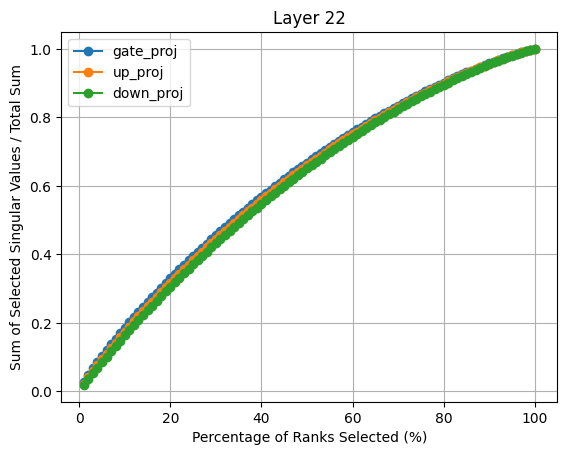

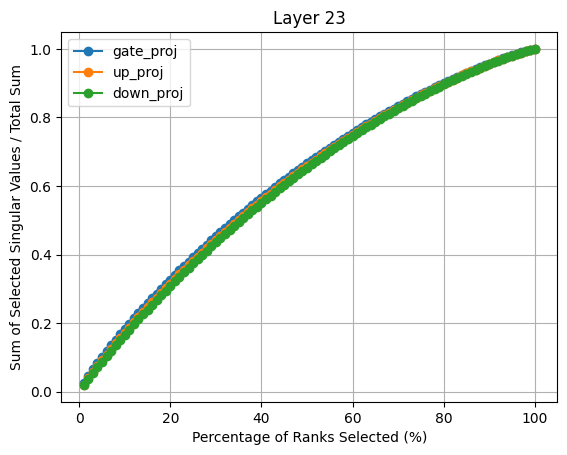

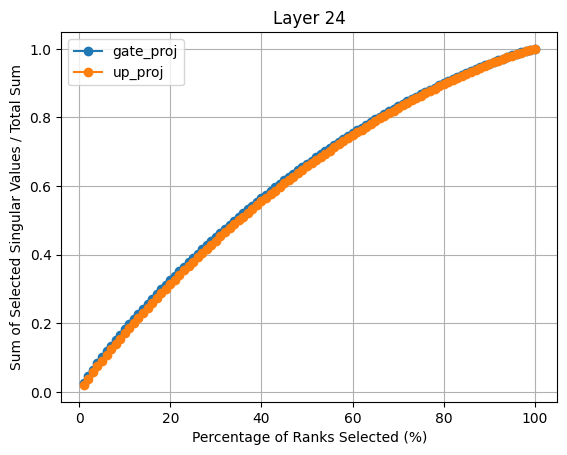

In [9]:
prev_k = 0
for k, singular_values in svds.items():

    num_layer = int(k.split('.')[2])
    proj_name = k.split('.')[-2]
    # Calculate the total sum of singular values
    total_singular_value_sum = np.sum(singular_values)

    # Preparing data for the plot
    percentages = np.arange(1, 101, 1)  # From 1% to 100%
    ratios = []

    for percent in percentages:
        k = int(len(singular_values) * (percent / 100))  # Number of ranks selected
        ratio = np.sum(singular_values[:k]) / total_singular_value_sum
        ratios.append(ratio)

    # Plotting
    if num_layer == prev_k:
        plt.plot(percentages, ratios, marker='o', label=proj_name)
        plt.xlabel('Percentage of Ranks Selected (%)')
        plt.ylabel('Sum of Selected Singular Values / Total Sum')
        plt.title(f'Layer {num_layer}')
        plt.grid(True)
        plt.legend()

    else:
        if num_layer < 5:
            plt.savefig(f'./figs/svd_{num_layer}.png')
        plt.show()
        plt.plot(percentages, ratios, marker='o', label=proj_name)
        plt.xlabel('Percentage of Ranks Selected (%)')
        plt.ylabel('Sum of Selected Singular Values / Total Sum')
        plt.title(f'Layer {num_layer}')
        plt.grid(True)

        prev_k += 1

In [14]:
import dask.array as da

In [19]:
da_matrix = da.from_array(matrix)

In [20]:
u, s, v = da.linalg.svd(da_matrix)

In [21]:
da.nump

dask.array<getitem-936e58c1acdf6b3500a030ff1534162e, shape=(4096,), dtype=float32, chunksize=(4096,), chunktype=numpy.ndarray>

In [24]:
svals = s.compute()

In [23]:
svals

()